In [9]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from pandarallel import pandarallel
from wordcloud import WordCloud
from collections import Counter

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [10]:
toxic = pd.read_csv('./../data/train.csv')
toxic

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \r\n\r\nThat...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \r\n\r\nUmm, theres no actual article ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [11]:
jigsaw = pd.read_csv('./../data/jigsaw.csv')
jigsaw

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \r\n http://wikimediafoundat...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \r\n\r\n You want to s...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [12]:
jigsaw.duplicated().sum()

0

In [13]:
jigsaw.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [14]:
jigsaw_toxic = pd.concat([toxic, jigsaw])
jigsaw_toxic

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \r\n http://wikimediafoundat...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \r\n\r\n You want to s...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [15]:
jigsaw_toxic.duplicated().sum(), jigsaw_toxic.isnull().sum()

(159570,
 id               0
 comment_text     0
 toxic            0
 severe_toxic     0
 obscene          0
 threat           0
 insult           0
 identity_hate    0
 dtype: int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


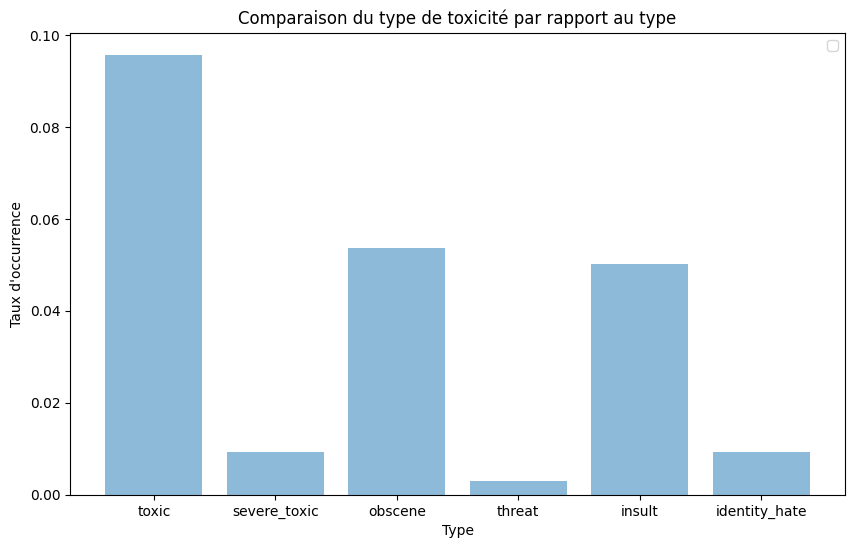

In [16]:
jigsaw_toxic['sentiment'] = jigsaw_toxic[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
 
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
toxicity_df = jigsaw_toxic[toxicity_columns]
 
occurrence_rates = toxicity_df.sum() / len(jigsaw_toxic)
 
plt.figure(figsize=(10, 6))
plt.bar(occurrence_rates.index, occurrence_rates.values, alpha=0.5)
 
plt.xlabel('Type')
plt.ylabel('Taux d\'occurrence')
plt.legend()
plt.title('Comparaison du type de toxicité par rapport au type')
plt.show()

In [17]:
jigsaw_toxic['sentiment'] = jigsaw_toxic[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].any(axis=1).astype(int)
jigsaw_toxic = jigsaw_toxic.drop(["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"], axis=1)
jigsaw_toxic

,id,comment_text,sentiment
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0
...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0
223545,fff9d70fe0722906,==Lucky bastard== \r\n http://wikimediafoundat...,0
223546,fffa8a11c4378854,==shame on you all!!!== \r\n\r\n You want to s...,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1


In [18]:
jigsaw_toxic['sentiment'].value_counts()

sentiment
0    344427
1     38693
Name: count, dtype: int64

In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
def treat_comment(comment, lp):
    spacy_comment = lp(comment, disable=["parser", "tagger", "ner", "textcat"])
    treated_tokens = [w.text for w in spacy_comment if (w.is_alpha and not w.is_stop) or w.text.lower() in ["not", "no", "never", "none", "nothing", "don't", "myself", "like"]]
    # treated_tokens = [w.text for w in spacy_comment if (w.is_alpha and not w.is_stop)]
    return " ".join(treated_tokens)

In [21]:
jigsaw_toxic_ones = jigsaw_toxic[jigsaw_toxic['sentiment'] == 1]
jigsaw_toxic_zeros = jigsaw_toxic[jigsaw_toxic['sentiment'] == 0]
jigsaw_toxic_zeros = jigsaw_toxic.sample(n=len(jigsaw_toxic[jigsaw_toxic['sentiment'] == 1]), random_state=42)
jigsaw_toxic = pd.concat([jigsaw_toxic_ones, jigsaw_toxic_zeros])
jigsaw_toxic.rename(columns={'sentiment': 'status'},inplace=True)

jigsaw_toxic['status'].value_counts()

status
1    42620
0    34766
Name: count, dtype: int64

In [22]:
jigsaw_toxic = jigsaw_toxic.reset_index()
jigsaw_toxic.drop(["index", "id"], axis=1, inplace=True)
jigsaw_toxic

,comment_text,status
0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
1,Hey... what is it..\r\n@ | talk .\r\nWhat is i...,1
2,"Bye! \r\n\r\nDon't look, come or think of comm...",1
3,You are gay or antisemmitian? \r\n\r\nArchange...,1
4,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1
...,...,...
77381,"Dude, how the heck hard is it for you to goto ...",0
77382,Long as in you're a faggoty Jew.,1
77383,Category:Place of birth missing (living people...,0
77384,":It's nota duplicate, but it uses some of the ...",0


In [23]:
suicide = pd.read_csv('./../data/suicide.csv')
suicide

,Unnamed: 0,text,class
0,0,Bucket List before I kill myself :)Okay so my ...,suicide
1,1,i have so many cute videos i wanna send to my ...,non-suicide
2,2,I guess i just want someone t hear this.It's h...,suicide
3,3,"ExhaustedI have diagnoses for PTSD, bipolar di...",suicide
4,4,"hah, you don’t even know what you’re asking me...",non-suicide
...,...,...,...
29995,29995,My mom used my savings money to buy alcohol an...,non-suicide
29996,29996,"shes gone april 2nd, 2021 3:27 am, my dog roxy...",non-suicide
29997,29997,Do anyone know any music with a deep beat if y...,non-suicide
29998,29998,ayo we hit 135 followers ily all \n\n\n*mwah*,non-suicide


In [24]:
suicide.replace({'non-suicide': 0, 'suicide': 2},inplace=True)
suicide.rename(columns={'text': 'comment_text', 'class': 'status'}, inplace=True)
suicide.drop('Unnamed: 0', axis=1, inplace=True)
suicide

,comment_text,status
0,Bucket List before I kill myself :)Okay so my ...,2
1,i have so many cute videos i wanna send to my ...,0
2,I guess i just want someone t hear this.It's h...,2
3,"ExhaustedI have diagnoses for PTSD, bipolar di...",2
4,"hah, you don’t even know what you’re asking me...",0
...,...,...
29995,My mom used my savings money to buy alcohol an...,0
29996,"shes gone april 2nd, 2021 3:27 am, my dog roxy...",0
29997,Do anyone know any music with a deep beat if y...,0
29998,ayo we hit 135 followers ily all \n\n\n*mwah*,0


In [25]:
df = pd.concat([jigsaw_toxic, suicide])
df.value_counts('status')
df.sample(frac=1).reset_index(drop=True)

,comment_text,status
0,I don't want to live.I just honestly don't wan...,2
1,OI YOU FUCKING DICKHEAD \r\n\r\nARE YOU LISTEN...,1
2,"He was a racial Jew, you fool. If you want to ...",1
3,manifesting a sugar mommy rn 💆‍♀️ using all of...,0
4,I thought I exorcised your parroting ass! Show...,1
...,...,...
107381,"""\r\n\r\nyour requests for info\r\nVoluntarySl...",0
107382,Just another post.I don't think I'm suicidal. ...,2
107383,Instead of posting this..... \r\n\r\nat the be...,0
107384,I can live with this. I like reliably sourced...,0


In [26]:
# df['comment_text'] = df['comment_text'].swifter.apply(treat_comment)
df['comment_text'] = df['comment_text'].parallel_apply(treat_comment, lp=nlp)

In [27]:
df

,comment_text,status
0,COCKSUCKER PISS WORK,1
1,Hey talk exclusive group WP TALIBANS good dest...,1
2,Bye look come think comming Tosser,1
3,gay antisemmitian Archangel WHite Tiger Meow G...,1
4,FUCK FILTHY MOTHER ASS DRY,1
...,...,...
29995,mom savings money buy alcohol hangout friends ...,0
29996,s gone april dog roxy took breath pain nt abil...,0
29997,know music deep beat know mean sick music look...,0
29998,ayo hit followers ily mwah,0


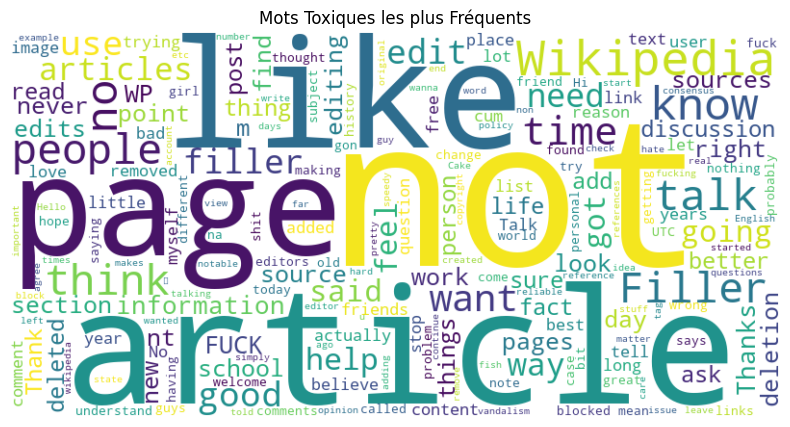

In [28]:
toxic_comments = df[df['status'] == 0]['comment_text']
 
# Compter la fréquence des mots
word_counts = Counter(" ".join(toxic_comments).split())
 
# Créer un graphique avec les mots les plus fréquents
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots Toxiques les plus Fréquents')
plt.show()

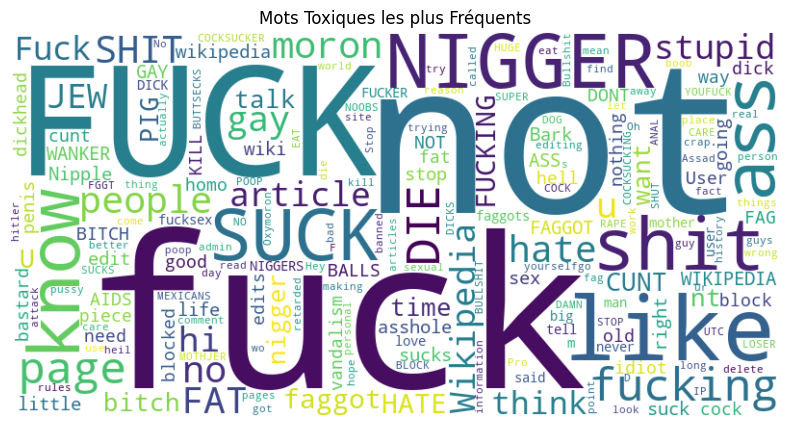

In [29]:
toxic_comments = df[df['status'] == 1]['comment_text']
 
# Compter la fréquence des mots
word_counts = Counter(" ".join(toxic_comments).split())
 
# Créer un graphique avec les mots les plus fréquents
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots Toxiques les plus Fréquents')
plt.show()

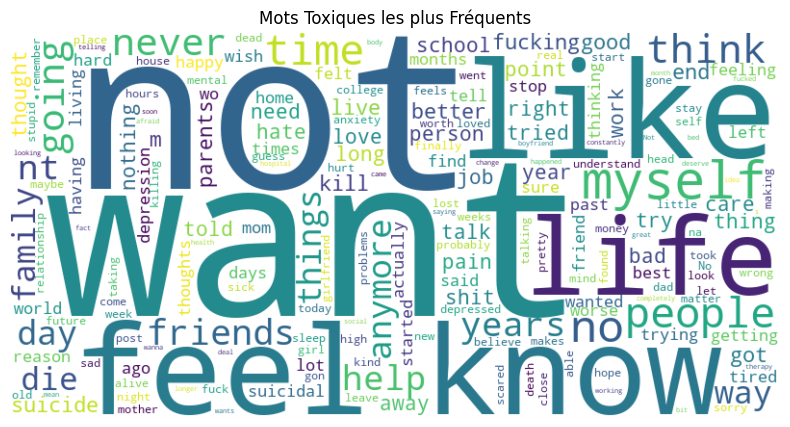

In [30]:
toxic_comments = df[df['status'] == 2]['comment_text']
 
# Compter la fréquence des mots
word_counts = Counter(" ".join(toxic_comments).split())
 
# Créer un graphique avec les mots les plus fréquents
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots Toxiques les plus Fréquents')
plt.show()

# MODEL AVEC LE CSV TOXIC

In [179]:
Y = toxic["status"]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(toxic["comment_text"])
X, Y

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

model = LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

0.9305679188178743

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(classification_report(y_pred, Y_test)), accuracy_score(Y_test, y_pred), confusion_matrix(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5037
           1       0.89      0.91      0.90      6197

    accuracy                           0.89     11234
   macro avg       0.89      0.89      0.89     11234
weighted avg       0.89      0.89      0.89     11234



(None,
 0.8914901192807548,
 array([[4372,  554],
        [ 665, 5643]], dtype=int64))

# MODEL AVEC LE CSV SUICIDE

In [181]:
Y = suicide["status"]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(suicide["comment_text"])
X, Y

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

model = LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

0.9386666666666666

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(classification_report(y_pred, Y_test)), accuracy_score(Y_test, y_pred), confusion_matrix(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3880
           2       0.90      0.93      0.92      3620

    accuracy                           0.92      7500
   macro avg       0.92      0.92      0.92      7500
weighted avg       0.92      0.92      0.92      7500



(None,
 0.9177333333333333,
 array([[3510,  247],
        [ 370, 3373]], dtype=int64))

# MODEL AVEC LES DEUX

In [ ]:
Y = df["status"]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["comment_text"])
X, Y

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

model = LogisticRegression()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(classification_report(y_pred, Y_test)), accuracy_score(Y_test, y_pred), confusion_matrix(Y_test, y_pred)

In [186]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression

model2.fit(X_train, Y_train)
model2.score()

AttributeError: 'csr_matrix' object has no attribute '_validate_params'

In [45]:
from googletrans import Translator

translator = Translator()

text_to_translate = "Je vais bien"

detected_language = translator.detect(text_to_translate).lang
translated_text = translator.translate(text_to_translate, src=detected_language, dest='en')

test = treat_comment(translated_text.text, nlp)
print(test)
test = vectorizer.transform([test])
y_pred = model.predict(test)
y_pred

Translated(src=fr, dest=en, text=I'm doing well, pronunciation=None, extra_data="{'confiden...")



array([0], dtype=int64)